In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Feature Extraction

In [ ]:
data['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [ ]:
df = pd.concat([data, data['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [ ]:
df = df.rename(columns={0: 'BloodPressure_Systolic_Value', 1: 'BloodPressure_Diastolic_Value'})


In [ ]:
df['Sleep Disorder'] = np.where(df['Sleep Disorder'] == 'Sleep Apnea', 'Sleep Apnea', 'Not Sleep Apnea')

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Systolic_Value,BloodPressure_Diastolic_Value
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Not Sleep Apnea,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Not Sleep Apnea,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Not Sleep Apnea,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [ ]:
df['BloodPressure_Systolic_Value'] = df['BloodPressure_Systolic_Value'].astype(float)
df['BloodPressure_Diastolic_Value'] = df['BloodPressure_Diastolic_Value'].astype(float)

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Systolic_Value,BloodPressure_Diastolic_Value
0,1,1,27,9,6.1,6,42,6,3,77,4200,0,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,0,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,0,125.0,80.0
3,4,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0
4,5,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0


In [ ]:
# Removing outlier
num_col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'BloodPressure_Systolic_Value', 'BloodPressure_Diastolic_Value']

# Q1 = df[num_col].quantile(0.25)
# Q3 = df[num_col].quantile(0.75)
# IQR = Q3 - Q1

# # Pake jarak 1.5 kali untuk outlier
# df = df[~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Systolic_Value,BloodPressure_Diastolic_Value
0,1,1,27,9,6.1,6,42,6,3,77,4200,0,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,0,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,0,125.0,80.0
3,4,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0
4,5,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,3,68,7000,1,140.0,95.0
370,371,0,59,5,8.0,9,75,3,3,68,7000,1,140.0,95.0
371,372,0,59,5,8.1,9,75,3,3,68,7000,1,140.0,95.0
372,373,0,59,5,8.1,9,75,3,3,68,7000,1,140.0,95.0


In [ ]:
# Normalization
scaler = MinMaxScaler()
df[num_col] = scaler.fit_transform(df[num_col])

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Systolic_Value,BloodPressure_Diastolic_Value
0,1,1,0.00000,9,0.111111,0.4,0.20,0.6,3,0.571429,0.171429,0,0.407407,0.40
1,2,1,0.03125,1,0.148148,0.4,0.50,1.0,0,0.476190,1.000000,0,0.370370,0.25
2,3,1,0.03125,1,0.148148,0.4,0.50,1.0,0,0.476190,1.000000,0,0.370370,0.25
3,4,1,0.03125,6,0.037037,0.0,0.00,1.0,2,0.952381,0.000000,1,0.925926,0.75
4,5,1,0.03125,6,0.037037,0.0,0.00,1.0,2,0.952381,0.000000,1,0.925926,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,1.00000,5,0.851852,1.0,0.75,0.0,3,0.142857,0.571429,1,0.925926,1.00
370,371,0,1.00000,5,0.814815,1.0,0.75,0.0,3,0.142857,0.571429,1,0.925926,1.00
371,372,0,1.00000,5,0.851852,1.0,0.75,0.0,3,0.142857,0.571429,1,0.925926,1.00
372,373,0,1.00000,5,0.851852,1.0,0.75,0.0,3,0.142857,0.571429,1,0.925926,1.00


In [ ]:
df = df.drop(columns=['Person ID'])

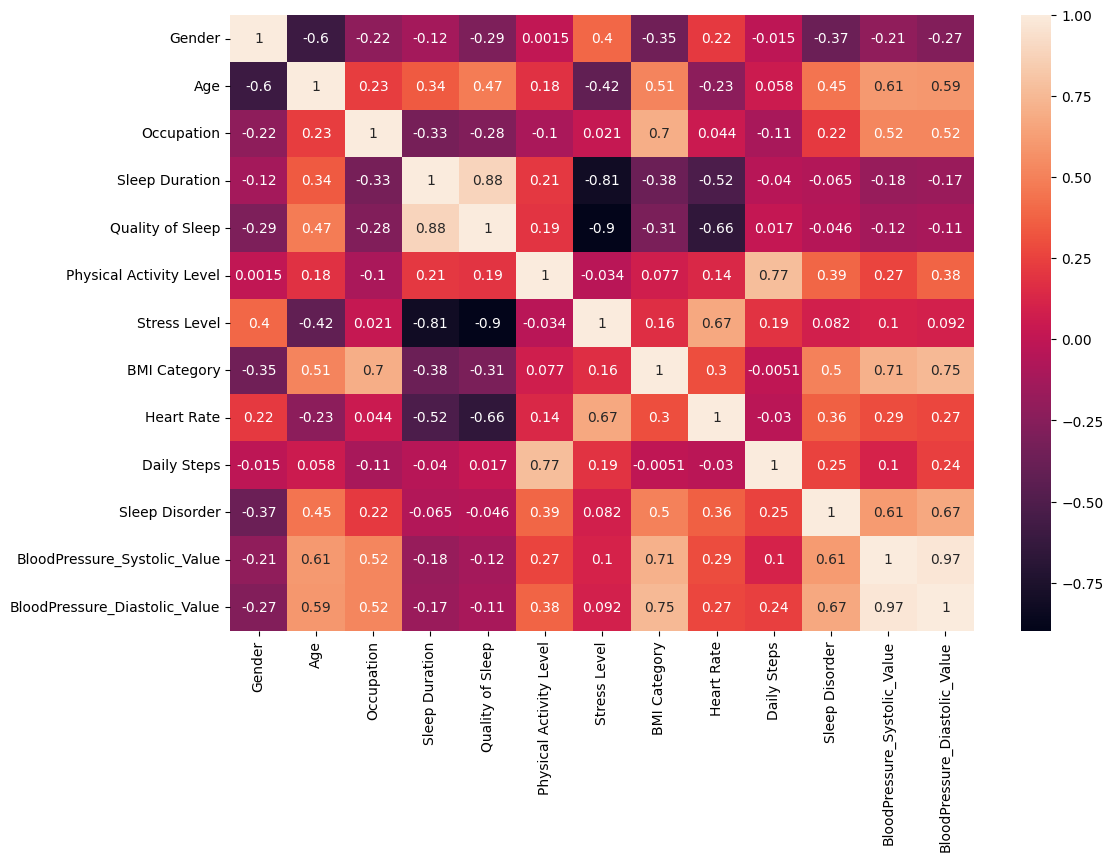

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

In [ ]:
X = df.drop(['Sleep Disorder', 'Occupation'], axis=1)
y = df['Sleep Disorder']

KeyError: "['Person ID'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

In [ ]:
feature_importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
df

In [ ]:
plt.figure(figsize=(12, 8))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Feature Importance:\n", feature_importance_df)


y_pred_train = rf_model.predict(X_train)

print("Train set ori acc: ", accuracy_score(y_train, y_pred_train))
print("Test set ori acc: ", accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", scores.mean())

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assume df is your DataFrame and X, y are already defined
# Define features and target
X = df.drop(['Sleep Disorder', 'Person ID', 'Occupation'], axis=1)
y = df['Sleep Disorder']

# Define the machine learning model (Random Forest Classifier)
model = RandomForestClassifier()

# Initialize a list with all feature indices
all_features = list(range(X.shape[1]))

# Get column names
feature_names = X.columns.tolist()

# Define the minimum number of features you want to retain
min_features_to_retain = 5

while len(all_features) > min_features_to_retain:
    # Train the model on the current set of features
    model.fit(X.iloc[:, all_features], y)

    # Get feature importances from the trained model
    importances = model.feature_importances_

    # Identify the least important feature
    worst_feature_idx = np.argmin(importances)
    worst_feature = all_features[worst_feature_idx]

    # Remove the least important feature
    all_features.remove(worst_feature)

    print(f"Removed Feature: {feature_names[worst_feature]}, Importance: {importances[worst_feature_idx]:.4f}")

# Print remaining feature names
remaining_features = [feature_names[i] for i in all_features]
print("Remaining feature names:", remaining_features)

In [ ]:
# import pandas as pd
# import seaborn as sb
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# from sklearn.model_selection import cross_val_score, learning_curvea

# # Load dataset
# data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
# data.info()

# # Feature Extraction
# data['Blood Pressure'].unique()
# df = pd.concat([data, data['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
# df = df.rename(columns={0: 'BloodPressure_Systolic_Value', 1: 'BloodPressure_Diastolic_Value'})
# df['Sleep Disorder'] = np.where(df['Sleep Disorder'] == 'Sleep Apnea', 'Sleep Apnea', 'Not Sleep Apnea')
# df['BloodPressure_Systolic_Value'] = df['BloodPressure_Systolic_Value'].astype(float)
# df['BloodPressure_Diastolic_Value'] = df['BloodPressure_Diastolic_Value'].astype(float)

# # Label Encoding
# label_encoder = preprocessing.LabelEncoder()
# df['Gender'] = label_encoder.fit_transform(df['Gender'])
# df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
# df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
# df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

# # Removing outliers
# num_col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
#            'Heart Rate', 'Daily Steps', 'BloodPressure_Systolic_Value', 'BloodPressure_Diastolic_Value']

# Q1 = df[num_col].quantile(0.25)
# Q3 = df[num_col].quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

# # Normalization
# scaler = MinMaxScaler()
# df[num_col] = scaler.fit_transform(df[num_col])

# # Correlation Matrix
# plt.figure(figsize=(12, 8))
# corr_matrix = df.corr()
# sb.heatmap(data=corr_matrix, annot=True)
# plt.show()

# # Splitting Data
# X = df.drop(['Sleep Disorder', 'Person ID', 'Occupation'], axis=1)
# y = df['Sleep Disorder']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Hyperparameter Tuning
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train_resampled, y_train_resampled)

# # Best Model
# best_rf_model = grid_search.best_estimator_
# best_rf_model.fit(X_train_resampled, y_train_resampled)

# # Evaluation
# y_pred = best_rf_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)
# feature_importances = best_rf_model.feature_importances_
# features = X.columns
# feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Plot Feature Importance
# plt.figure(figsize=(12, 8))
# sb.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.title('Feature Importance')
# plt.show()

# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_rep)
# print("Feature Importance:\n", feature_importance_df)

# # Cross-Validation Scores
# scores = cross_val_score(best_rf_model, X, y, cv=5)
# print("Cross-Validation Scores: ", scores)
# print("Mean Cross-Validation Score: ", scores.mean())

# # Learning Curve
# train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure()
# plt.plot(train_sizes, train_scores_mean, label='Training Score')
# plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
# plt.xlabel('Training Set Size')
# plt.ylabel('Accuracy')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Preprocessing
# Convert categorical variables to numerical values
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Occupation'] = le.fit_transform(data['Occupation'])
data['BMI Category'] = le.fit_transform(data['BMI Category'])
data['Sleep Disorder'] = le.fit_transform(data['Sleep Disorder'])

# Filtering for "Sleep Apnea"
data['Sleep Apnea'] = data['Sleep Disorder'].apply(lambda x: 1 if x == 1 else 0)  # Assuming 'Sleep Apnea' is labeled as 1
data.drop('Sleep Disorder', axis=1, inplace=True)

# Split the data into features and target
X = data.drop(['Person ID', 'Sleep Apnea', 'Blood Pressure'], axis=1)
y = data['Sleep Apnea']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = rf.feature_importances_
features = X.columns
important_features = pd.Series(feature_importances, index=features).sort_values(ascending=False)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, X_res, y_res, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

# Plot the learning curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)
plt.title('Learning Curve for Random Forest with SMOTE')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

# Display results
print("Feature Importances:")
print(important_features)
print("\nAccuracy:")
print(accuracy)
print("\nClassification Report:")
print(report)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Preprocessing
# Convert categorical variables to numerical values
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Occupation'] = le.fit_transform(data['Occupation'])
data['BMI Category'] = le.fit_transform(data['BMI Category'])
data['Sleep Disorder'] = le.fit_transform(data['Sleep Disorder'])

# Process "Blood Pressure" column
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)

# Filtering for "Sleep Apnea"
data['Sleep Apnea'] = data['Sleep Disorder'].apply(lambda x: 1 if x == 1 else 0)  # Assuming 'Sleep Apnea' is labeled as 1
data.drop('Sleep Disorder', axis=1, inplace=True)

# Drop original "Blood Pressure" column
data.drop('Blood Pressure', axis=1, inplace=True)

# Split the data into features and target
X = data.drop(['Person ID', 'Sleep Apnea'], axis=1)
y = data['Sleep Apnea']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = rf.feature_importances_
features = X.columns
important_features = pd.Series(feature_importances, index=features).sort_values(ascending=False)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, X_res, y_res, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

# Plot the learning curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)
plt.title('Learning Curve for Random Forest with SMOTE')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

# Display results
print("Feature Importances:")
print(important_features)
print("\nAccuracy:")
print(accuracy)
print("\nClassification Report:")
print(report)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Preprocessing
# Convert categorical variables to numerical values
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Occupation'] = le.fit_transform(data['Occupation'])
data['BMI Category'] = le.fit_transform(data['BMI Category'])
data['Sleep Disorder'] = le.fit_transform(data['Sleep Disorder'])

# Process "Blood Pressure" column
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)

# Filtering for "Sleep Apnea"
data['Sleep Apnea'] = data['Sleep Disorder'].apply(lambda x: 1 if x == 1 else 0)  # Assuming 'Sleep Apnea' is labeled as 1
data.drop('Sleep Disorder', axis=1, inplace=True)

# Drop original "Blood Pressure" column
data.drop('Blood Pressure', axis=1, inplace=True)

# Split the data into features and target
X = data.drop(['Person ID', 'Sleep Apnea'], axis=1)
y = data['Sleep Apnea']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = rf.feature_importances_
features = X.columns
important_features = pd.Series(feature_importances, index=features).sort_values(ascending=False)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, X_train_res, y_train_res, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

# Plot the learning curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)
plt.title('Learning Curve for Random Forest with SMOTE')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

# Display results
print("Feature Importances:")
print(important_features)
print("\nAccuracy:")
print(accuracy)
print("\nClassification Report:")
print(report)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Preprocessing
# Convert categorical variables to numerical values
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Occupation'] = le.fit_transform(data['Occupation'])
data['BMI Category'] = le.fit_transform(data['BMI Category'])
data['Sleep Disorder'] = le.fit_transform(data['Sleep Disorder'])

# Process "Blood Pressure" column
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)

# Filtering for "Sleep Apnea"
data['Sleep Apnea'] = data['Sleep Disorder'].apply(lambda x: 1 if x == 1 else 0)  # Assuming 'Sleep Apnea' is labeled as 1
data.drop('Sleep Disorder', axis=1, inplace=True)

# Drop original "Blood Pressure" column
data.drop('Blood Pressure', axis=1, inplace=True)

# Split the data into features and target
X = data.drop(['Person ID', 'Sleep Apnea'], axis=1)
y = data['Sleep Apnea']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = rf.feature_importances_
features = X.columns
important_features = pd.Series(feature_importances, index=features).sort_values(ascending=False)

# Retrain the model with important features
# Select top N features
N = 5 # Adjust this number based on how many top features you want to use
top_features = important_features.index[:N]

X_train_top = X_train_res[top_features]
X_test_top = X_test[top_features]

# Retrain the model with top features
rf_top = RandomForestClassifier(n_estimators=100, random_state=42)
rf_top.fit(X_train_top, y_train_res)

# Make predictions with the new model
y_pred_top = rf_top.predict(X_test_top)

# Calculate accuracy with top features
accuracy_top = accuracy_score(y_test, y_pred_top)
report_top = classification_report(y_test, y_pred_top)

# Learning curve with top features
train_sizes, train_scores, test_scores = learning_curve(rf_top, X_train_top, y_train_res, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

# Plot the learning curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)
plt.title('Learning Curve for Random Forest with SMOTE (Top Features)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

# Display results
print("Feature Importances:")
print(important_features)
print("\nOriginal Model Accuracy:")
print(accuracy)
print("\nOriginal Model Classification Report:")
print(report)
print("\nTop Features Model Accuracy:")
print(accuracy_top)
print("\nTop Features Model Classification Report:")
print(report_top)
